# Etivity2: Data Preparation

## Student Name: Pieter Johannes Alberts (Johann)
## Student ID: 22179046

## A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

df = pd.read_csv("./bank.csv")

In [2]:
# Inspect dataframe head
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [3]:
# Inspect dataframe tail
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [4]:
# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [5]:
# Make copy of original dataset
# for comparison with scaled and
# transformed features
df_original = df.copy(deep=True)

In [6]:
# Check missing values
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [7]:
# Check if any column has more than 25% missing values
(df.isna().sum() / len(df) * 100)

age            0.60
job            0.50
marital        0.00
education      5.20
default        0.00
balance        0.00
housing        0.00
loan           0.00
contact        9.55
day            0.00
month          0.00
duration       0.00
campaign       0.00
pdays          0.00
previous       0.00
poutcome      22.70
subscribed     0.00
dtype: float64

No columns contain more than 25% -30% missing values, so no columns need to be dropped outright.

## B. Treatment of missing values

### B.1. Numerical Attributes

In [8]:
# Isolate numerical attribute
numerical = df.select_dtypes(['int64', 'float64']).columns.values
print(numerical)

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']


In [9]:
# Check missing values for numerical columns only
df[numerical].isnull().sum()

age         12
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64

Only the `age` column contains missing values.

#### B.1.1 Impute missing age values

In [10]:
# Get description of age attribute
df['age'].describe()

count    1988.000000
mean       41.753018
std        12.724358
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

In [11]:
# Get the median value for age
df['age'].median()

38.0

In [12]:
df['age'].plot(kind='hist', bins=20)
plt.title('Distribution for the numerical age attribute');

As can be seen from the histogram above, the distribution for `age` is skewed to the right with the majority of contacts being in the lower age range. The median value of 38 may be the best choice for imputing missing `age` values. The mean of 41.75 does not align very well with the peak of the age distribution.

In [13]:
# Impute missing age value with median value
df['age'].fillna(df['age'].median(), inplace=True)

In [14]:
# Confirm no missing value for age is present
df['age'].isnull().sum()

0

### B.2. Categorical Attributes

In [15]:
# Isolate categorical attributes
categorical = df.select_dtypes(['object']).columns.values
print(categorical)

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'subscribed']


In [16]:
# Get missing value counts for categorical attributes
df[categorical].isnull().sum()

job            10
marital         0
education     104
default         0
housing         0
loan            0
contact       191
month           0
poutcome      454
subscribed      0
dtype: int64

##### job attribute

In [17]:
# Get value counts for job
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [18]:
job_missing_df = df.loc[df['job'].isna()]

In [19]:
job_missing_df

age  job  marital  education default  balance housing loan    contact  \
255   42.0  NaN   single    primary      no     2398     yes   no   cellular   
257   46.0  NaN  married        NaN      no      677      no   no   cellular   
831   41.0  NaN   single    primary      no     2398     yes   no        NaN   
1223  55.0  NaN  married  secondary      no     2206      no   no   cellular   
1281  50.0  NaN  married        NaN      no      558      no   no   cellular   
1669  54.0  NaN  married  secondary      no     2206      no   no   cellular   
1711  77.0  NaN  married        NaN      no      397      no   no  telephone   
1801  28.0  NaN   single        NaN      no      326      no   no   cellular   
1868  48.0  NaN   single        NaN      no     1819      no   no   cellular   
1975  45.0  NaN  married   tertiary      no      406      no   no   cellular   

      day month  duration  campaign  pdays  previous poutcome subscribed  
255     3   feb       144         2    271         2  failure         no  
257     3   feb       425         1     82         1  failure         no  
831     8   may       287         2     -1         0      NaN         no  
1223   12   aug       265         1     91         5  success        yes  
1281    9   jul       464         1    683         6  failure        yes  
1669   13   may       260         1     91         4  success        yes  
1711    7   may       300         3     -1         0      NaN        yes  
1801   11   oct       450         1    231         1  success        yes  
1868    2   sep      1440         1    458         1  failure        yes  
1975    7   sep       314         1     -1         0      NaN        yes

In [20]:
df.loc[df['job'] == 'retired']['age'].describe()

count    162.00000
mean      66.87037
std        9.21391
min       38.00000
25%       60.00000
50%       66.50000
75%       73.00000
max       93.00000
Name: age, dtype: float64

I investigated whether any of the contacts with missing `job` values could be identified by age as they could then be imputed as *retired*. However, only one contact with a missing age value falls above the 25% quartile, so it wouldn't be valid to impute these values so. Looking at the isolated dataframe `job_missing_df`, there is no obvious indicator that can be used to impute `job` values.

##### contact attribute

In [21]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [22]:
(df['contact'].value_counts() / len(df)) * 100

cellular     83.15
telephone     7.30
Name: contact, dtype: float64

In [23]:
df.groupby(by=['job', 'contact']).size().plot(kind='bar')
plt.title('Contact type per job type');

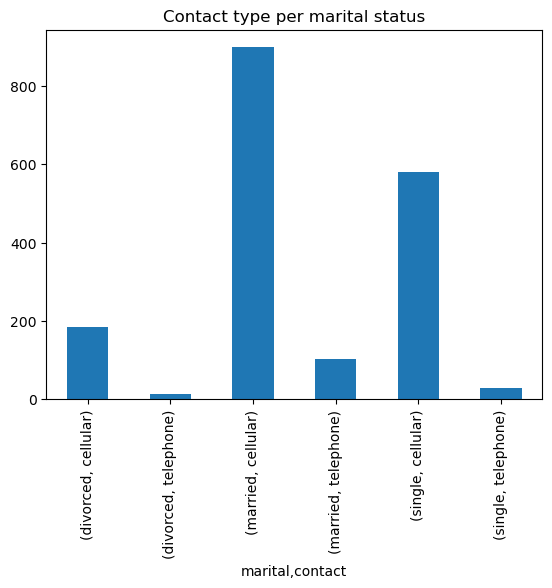

In [24]:
df.groupby(by=['marital', 'contact']).size().plot(kind='bar')
plt.title('Contact type per marital status');

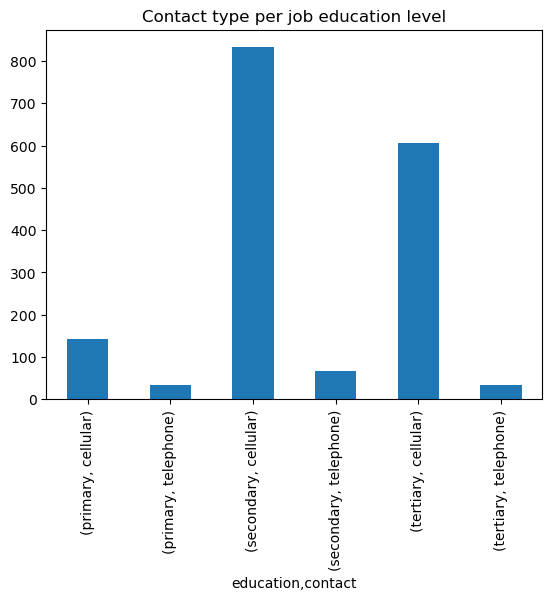

In [25]:
df.groupby(by=['education', 'contact']).size().plot(kind='bar')
plt.title('Contact type per job education level');

For the `contact` property, there doesn't seem to be a correlated feature which can be used to accurately impute missing values. Analysing the value counts shows that 83.15% of contact (the vast majority) have *cellular* as their contact method. As such, missing values for `contact` will be imputed using *cellular* to replace missing values.

In [26]:
# Fill missing contact values with "cellular"
df['contact'].fillna('cellular', inplace=True)

In [27]:
# Confirm that no missing values are present in "contact" column
df['contact'].isnull().sum()

0

#### education attribute

In [28]:
df.groupby(by=['marital', 'education']).size().plot(kind='bar')

<AxesSubplot:xlabel='marital,education'>

In [29]:
plt.figure(figsize=(16, 6))
df.groupby(by=['job', 'education']).size().plot(kind='bar');

Looking at the plot above, we can see that for the following job titles, the vast number of job titles have a certain education level.

These are:

- **admin** - *secondary*
- **management** - *tertiary*
- **services** - *secondary*

None of the other job types shows such a clear majority of education level. Following this analysis, the missing education values will be imputed as per the pattern identified above.

In [30]:
education_mapper = {
    'admin': 'secondary',
    'management': 'tertiary',
    'services': 'secondary'
}

df['education'] = df['education'].fillna(df['job'].map(education_mapper))

In [31]:
df['education'].isnull().sum()

74

The missing value for eduction have been reduced from 104 to 74, but it's still not good enough. It will be investigated further below.

In [32]:
df.loc[df['education'].isnull()]

age          job   marital education default  balance housing loan  \
15    38.0  blue-collar   married       NaN      no        0     yes   no   
124   39.0  blue-collar   married       NaN      no        0      no   no   
257   46.0          NaN   married       NaN      no      677      no   no   
262   31.0  blue-collar   married       NaN      no     -120     yes   no   
285   51.0   technician  divorced       NaN      no     1328     yes   no   
...    ...          ...       ...       ...     ...      ...     ...  ...   
1935  69.0      retired   married       NaN      no      426      no   no   
1938  67.0      retired   married       NaN      no     2540      no   no   
1972  29.0   unemployed    single       NaN      no     1584      no   no   
1985  21.0      student    single       NaN      no     1506      no   no   
1995  20.0      student    single       NaN      no     2785      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
15     cellular    2   apr       477         2    267         1  failure   
124    cellular    2   feb       731         1    193         3  failure   
257    cellular    3   feb       425         1     82         1  failure   
262    cellular    3   feb       100         3    201         2  failure   
285    cellular    4   feb       119         1    251         1  failure   
...         ...  ...   ...       ...       ...    ...       ...      ...   
1935  telephone   10   sep       211         2    185         2  success   
1938  telephone   14   sep       279         3     92         9  success   
1972   cellular    6   sep       245         1     -1         0      NaN   
1985   cellular   14   sep       340         1     -1         0      NaN   
1995   cellular   16   sep       327         2     -1         0      NaN   

     subscribed  
15           no  
124          no  
257          no  
262          no  
285          no  
...         ...  
1935        yes  
1938        yes  
1972        yes  
1985        yes  
1995        yes  

[74 rows x 17 columns]

In [33]:
df.groupby(by=['housing', 'education']).size().plot(kind='bar');

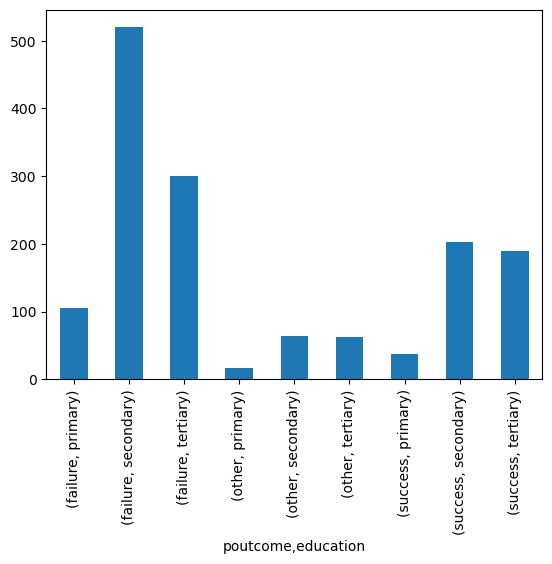

In [34]:
df.groupby(by=['poutcome', 'education']).size().plot(kind='bar');

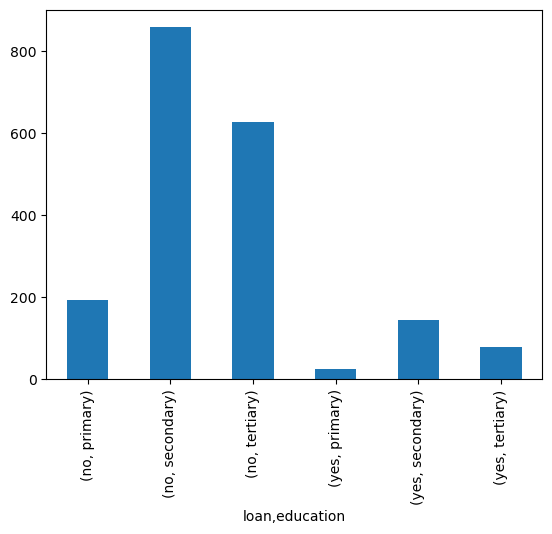

In [35]:
df.groupby(by=['loan', 'education']).size().plot(kind='bar');

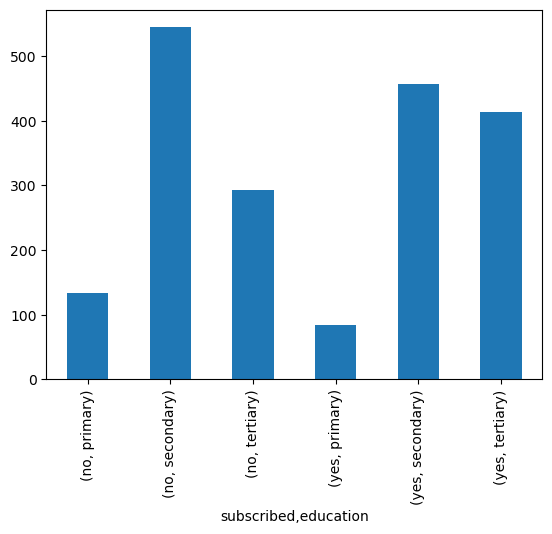

In [36]:
df.groupby(by=['subscribed', 'education']).size().plot(kind='bar');

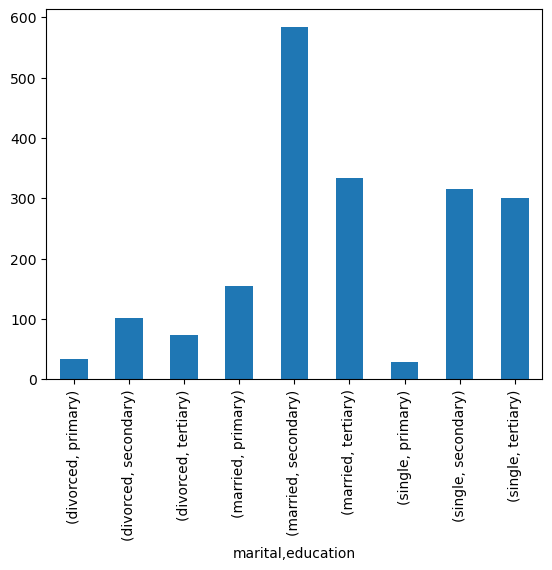

In [37]:
df.groupby(by=['marital', 'education']).size().plot(kind='bar');

As no obvious further pattern could be discerned to impute to remaining missing values for `education`, the rows (74) with remaining values for this attribute will be dropped.

In [38]:
df = df.dropna(subset=['education'])

In [39]:
df.isnull().sum()

age             0
job             5
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      430
subscribed      0
dtype: int64

In [40]:
# Verify that 74 rows have been dropped (2000-74=1926)
len(df)

1926

#### poutcome attribute

In [41]:
df['poutcome'].value_counts()

failure    925
success    428
other      143
Name: poutcome, dtype: int64

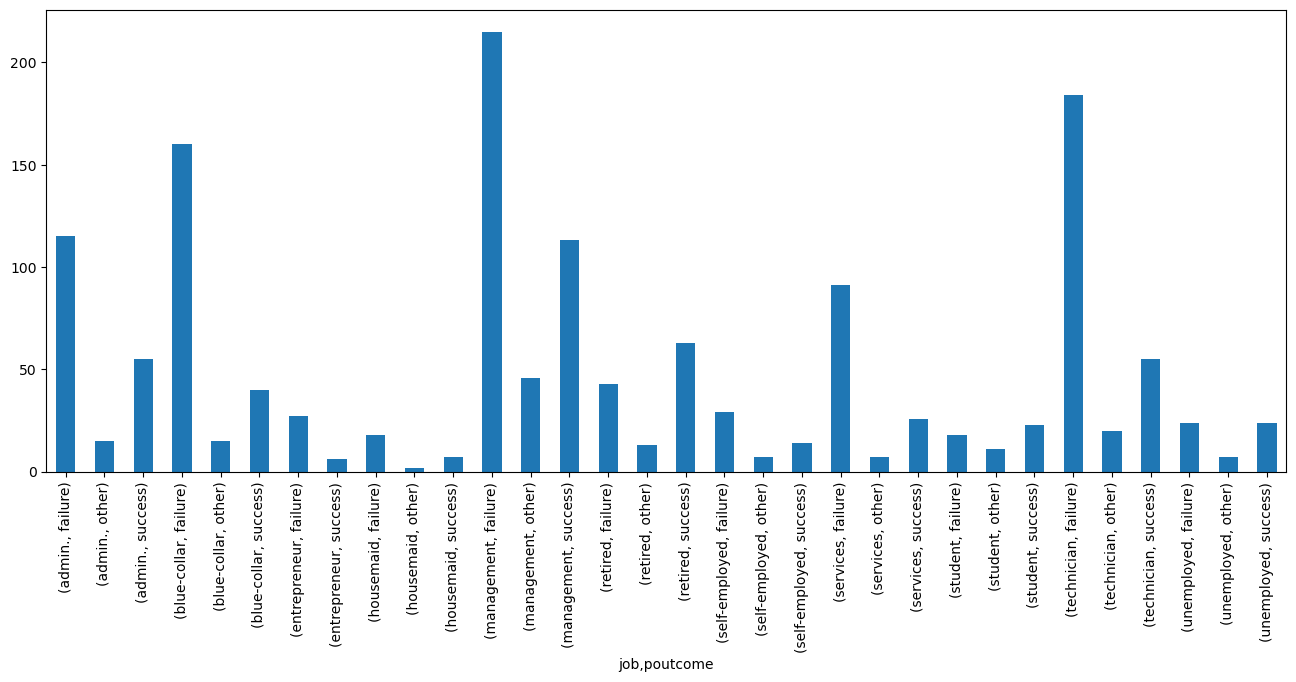

In [42]:
plt.figure(figsize=(16, 6))
df.groupby(by=['job', 'poutcome']).size().plot(kind='bar');

Looking at the plot above, it's not obvious that there is away that `poutcome` can be determined based on `job` title. We know that there are 430 missing values for the `poutcome` column, so next I'll look at whether there are any value counts for the other attributes that match this to try and find some kind of relationship.

In [43]:
# Extract all column names
columns = df.columns.to_list()
columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [44]:
# Create a list of dataframes with value counts for each
# column name
dataframes = []
for column in columns:
    val_counts_df = df[column].value_counts().rename('val_counts').reset_index()
    val_counts_df.set_index('index', inplace=True)
    val_counts_df['column'] = column
    dataframes.append(val_counts_df)

In [45]:
# Create concatenated dataframe of generated
# value counts dataframes list
concat_val_counts_df = pd.concat(dataframes)

In [46]:
# Inspect head of concatenated value counts dataframe
concat_val_counts_df.head()

val_counts column
index                   
33.0           94    age
35.0           88    age
31.0           86    age
34.0           84    age
38.0           76    age

In [47]:
# Inspect tail of concatenated value counts dataframe
concat_val_counts_df.tail()

val_counts      column
index                          
failure         925    poutcome
success         428    poutcome
other           143    poutcome
no              971  subscribed
yes             955  subscribed

In [48]:
# Check whether any value counts equals the 430 missing value
# counts for the poutcome attribute
concat_val_counts_df.loc[concat_val_counts_df['val_counts'] == 430]

val_counts    column
index                      
-1            430     pdays
0             430  previous

The number of contacts who had zero calls in previous campaigns is the same as the number of contacts with missing values for `poutcome`.

In [49]:
# Isolate rows with missing values for poutcome and inspect the previous column values
poutcome_missing_df = df.loc[df['poutcome'].isna()]
print(poutcome_missing_df['previous'].value_counts())
print(poutcome_missing_df['pdays'].value_counts())

0    430
Name: previous, dtype: int64
-1    430
Name: pdays, dtype: int64


The findings relating to `previous` seem consistant with all contacts having had zero previous campaign calls. As such, the missing values for `poutcome` will be imputed with a new value called *no_previous_contact*.

In [50]:
# Fill missing values in poutcome column with 'no_previous_contact'
df['poutcome'].fillna('no_previous_contact', inplace=True)

In [51]:
# Verify that no missing values are present for poutcome
df['poutcome'].isnull().sum()

0

## C. Feature Engineering

A new feature called `total_calls` will be created which is the sum of the `previous` and `campaign` columns.

#### total_calls

A new feature called `total_calls` will be created which is a combination of the `previous` and `campaign` attributes.

In [52]:
df['total_calls'] = df['previous'] + df['campaign']

In [53]:
# Get numerical description for new "total_calls" attribute
df['total_calls'].describe()

count    1926.000000
mean        4.499481
std         3.887877
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        58.000000
Name: total_calls, dtype: float64

#### contact_quarter

A new feature called `contact_quarter` will be created which will take the `month` attribute and map it to each of the annual quarters.

In [54]:
# Map months to quarters
quarter_mapper = {
    'jan': 1,
    'feb': 1,
    'mar': 1,
    'apr': 2,
    'may': 2,
    'jun': 2,
    'jul': 3,
    'aug': 3,
    'sep': 3,
    'oct': 4,
    'nov': 4,
    'dec': 4,
}

# Create new column with mapping based on month 
df['contact_quarter'] = df['month'].map(quarter_mapper)

In [55]:
# Confirm the four expected values are present for new column 
df['contact_quarter'].value_counts()

1    700
2    618
3    411
4    197
Name: contact_quarter, dtype: int64

## D. Process and Encode the Categorical Features

There are no columns that can be dropped outright, like ID. As such, encoding of the relevant features will take place next. Categorical attributes with not missing values will be encoded first. In the next section

### D.1. Encode Cyclical Data

#### D.1.1 month attribute

In [56]:
# Display unique month values for mapper below
df['month'].unique()

array(['apr', 'dec', 'feb', 'jan', 'mar', 'may', 'nov', 'oct', 'aug',
       'jul', 'jun', 'sep'], dtype=object)

In [57]:
# Map months to numerical values
month_mapper = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11
}

# Replace current month values with numerical mappings
df['month'] = df['month'].replace(month_mapper)

In [58]:
# Confirm that month values have been encoded
df['month'].unique()

array([ 3, 11,  1,  0,  2,  4, 10,  9,  7,  6,  5,  8])

In [59]:
# Create sin transformation of month values
df['sin_month'] = np.sin(2 * np.pi * df['month'] / max(df['month']))
                         
# Create cos transformation of month values
df['cos_month'] = np.cos(2 * np.pi * df['month'] / max(df['month']))

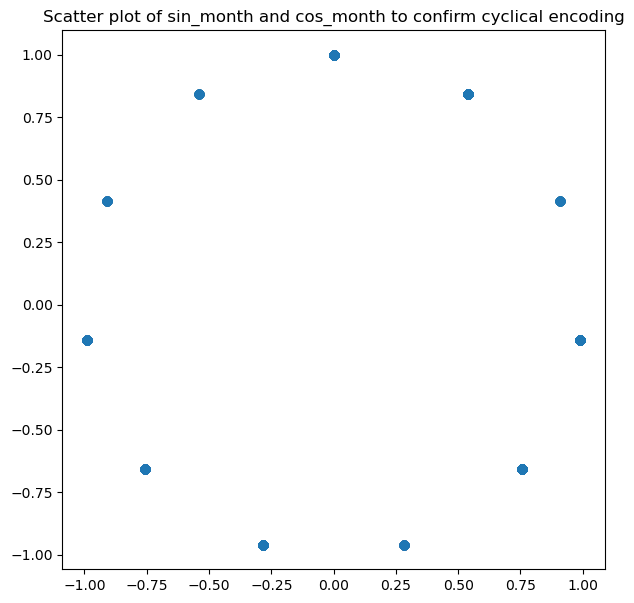

In [60]:
plt.figure(figsize=(7, 7))
plt.scatter(df['sin_month'], df['cos_month'])
plt.title('Scatter plot of sin_month and cos_month to confirm cyclical encoding');

#### D.1.2 day attribute

In [61]:
# Inspect 'day' values for encoding
df_original['day'].unique()

array([ 1,  2,  3, 20,  4,  7,  9, 10, 14, 16, 17, 18, 21, 24, 28, 29, 30,
        5,  6, 11, 13, 19, 26, 27,  8, 12, 22, 25, 15, 23, 31])

In [62]:
# Create sin transformation of day values
df['sin_day'] = np.sin(2 * np.pi * df['day'] / max(df['day']))
                         
# Create cos transformation of day values
df['cos_day'] = np.cos(2 * np.pi * df['day'] / max(df['day']))

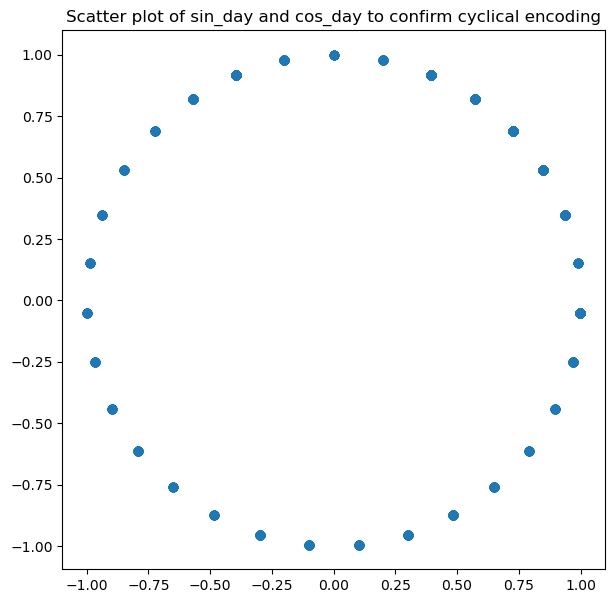

In [63]:
plt.figure(figsize=(7, 7))
plt.scatter(df['sin_day'], df['cos_day'])
plt.title('Scatter plot of sin_day and cos_day to confirm cyclical encoding');

#### D.1.3 contact_quarter attribute

In [64]:
# Create sin transformation of contact_quarter values
df['sin_contact_quarter'] = np.sin(2 * np.pi * df['contact_quarter'] / max(df['contact_quarter']))
                         
# Create cos transformation of contact_quarter values
df['cos_contact_quarter'] = np.cos(2 * np.pi * df['contact_quarter'] / max(df['contact_quarter']))

In [65]:
plt.figure(figsize=(7, 7))
plt.scatter(df['sin_contact_quarter'], df['cos_contact_quarter'])
plt.title('Scatter plot of sin_contact_quarter and cos_contact_quarter to confirm cyclical encoding');

In [66]:
# Drop original "month", "day" and "contact_quarter" columns
df.drop(['month', 'day', 'contact_quarter'], axis=1, inplace=True)

### D.2. Map Binary Categorical Values

In [67]:
categorical = list(categorical)
print(categorical)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In [68]:
# Print binary features
categorical.remove('month')
df[categorical].nunique()

job           11
marital        3
education      3
default        2
housing        2
loan           2
contact        2
poutcome       4
subscribed     2
dtype: int64

In [69]:
# Inspect possible values for binary features
df[['default', 'housing', 'loan', 'contact']].value_counts()

default  housing  loan  contact  
no       no       no    cellular     821
         yes      no    cellular     731
                  yes   cellular     155
         no       no    telephone     84
                  yes   cellular      70
         yes      no    telephone     34
                  yes   telephone      9
         no       yes   telephone      7
yes      yes      no    cellular       5
         no       no    cellular       4
                  yes   cellular       3
         yes      yes   cellular       3
dtype: int64

In [70]:
# Create mapper to convert "yes/no" categorical features to 0 and 1
yes_no_mapper = {
    "no": 0,
    "yes": 1
}

df[['default', 'housing', 'loan']] = df[['default', 'housing', 'loan']].replace(yes_no_mapper)

In [71]:
# Confitm that mapping took place
df[['default', 'housing', 'loan', 'contact']].value_counts()

default  housing  loan  contact  
0        0        0     cellular     821
         1        0     cellular     731
                  1     cellular     155
         0        0     telephone     84
                  1     cellular      70
         1        0     telephone     34
                  1     telephone      9
         0        1     telephone      7
1        1        0     cellular       5
         0        0     cellular       4
                  1     cellular       3
         1        1     cellular       3
dtype: int64

### D.3. One-Hot Encode Remaining Categorical Attributes

In [72]:
df.head()

age          job   marital  education  default  balance  housing  loan  \
0  32.0   technician    single   tertiary        0      392        1     0   
1  39.0   technician  divorced  secondary        0      688        1     1   
2  59.0      retired   married  secondary        0     1035        1     1   
3  47.0  blue-collar   married  secondary        0      398        1     1   
4  54.0      retired   married  secondary        0     1004        1     0   

    contact  duration  ...  previous  poutcome  subscribed total_calls  \
0  cellular       957  ...         2   failure          no           4   
1  cellular       233  ...         1   failure          no           3   
2  cellular       126  ...         1   failure          no           3   
3  cellular       274  ...         2   failure          no           3   
4  cellular       479  ...         1   failure          no           2   

  sin_month  cos_month   sin_day  cos_day  sin_contact_quarter  \
0  0.989821  -0.142315  0.201299  0.97953         1.224647e-16   
1  0.989821  -0.142315  0.201299  0.97953         1.224647e-16   
2  0.989821  -0.142315  0.201299  0.97953         1.224647e-16   
3  0.989821  -0.142315  0.201299  0.97953         1.224647e-16   
4  0.989821  -0.142315  0.201299  0.97953         1.224647e-16   

   cos_contact_quarter  
0                 -1.0  
1                 -1.0  
2                 -1.0  
3                 -1.0  
4                 -1.0  

[5 rows x 22 columns]

In [73]:
# Perform One-Hot-Encoding in categorical attributes
df = pd.get_dummies(df,
                    columns=['job', 'marital', 'education',
                             'contact', 'poutcome'], 
                    dummy_na=True, 
                    drop_first=True)

In [74]:
df.head(5)

age  default  balance  housing  loan  duration  campaign  pdays  previous  \
0  32.0        0      392        1     0       957         2    131         2   
1  39.0        0      688        1     1       233         2    133         1   
2  59.0        0     1035        1     1       126         2    239         1   
3  47.0        0      398        1     1       274         1    238         2   
4  54.0        0     1004        1     0       479         1    307         1   

  subscribed  ...  marital_nan  education_secondary  education_tertiary  \
0         no  ...            0                    0                   1   
1         no  ...            0                    1                   0   
2         no  ...            0                    1                   0   
3         no  ...            0                    1                   0   
4         no  ...            0                    1                   0   

   education_nan  contact_telephone  contact_nan  \
0              0                  0            0   
1              0                  0            0   
2              0                  0            0   
3              0                  0            0   
4              0                  0            0   

   poutcome_no_previous_contact  poutcome_other  poutcome_success  \
0                             0               0                 0   
1                             0               0                 0   
2                             0               0                 0   
3                             0               0                 0   
4                             0               0                 0   

   poutcome_nan  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 40 columns]

### D.4. Encode Target Attribute

`subscribed` is the target attribute and will be converted to 0 and 1 for subscribed=False and subscribed=True respectively.

In [75]:
# Encode "subscribed" as 0/1 values
df['subscribed'] = df['subscribed'].replace(yes_no_mapper)
df.head(3)

age  default  balance  housing  loan  duration  campaign  pdays  previous  \
0  32.0        0      392        1     0       957         2    131         2   
1  39.0        0      688        1     1       233         2    133         1   
2  59.0        0     1035        1     1       126         2    239         1   

   subscribed  ...  marital_nan  education_secondary  education_tertiary  \
0           0  ...            0                    0                   1   
1           0  ...            0                    1                   0   
2           0  ...            0                    1                   0   

   education_nan  contact_telephone  contact_nan  \
0              0                  0            0   
1              0                  0            0   
2              0                  0            0   

   poutcome_no_previous_contact  poutcome_other  poutcome_success  \
0                             0               0                 0   
1                             0               0                 0   
2                             0               0                 0   

   poutcome_nan  
0             0  
1             0  
2             0  

[3 rows x 40 columns]

In [76]:
# Confirm that no "object" datatypes exists anymore
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 1999
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1926 non-null   float64
 1   default                       1926 non-null   int64  
 2   balance                       1926 non-null   int64  
 3   housing                       1926 non-null   int64  
 4   loan                          1926 non-null   int64  
 5   duration                      1926 non-null   int64  
 6   campaign                      1926 non-null   int64  
 7   pdays                         1926 non-null   int64  
 8   previous                      1926 non-null   int64  
 9   subscribed                    1926 non-null   int64  
 10  total_calls                   1926 non-null   int64  
 11  sin_month                     1926 non-null   float64
 12  cos_month                     1926 non-null   float64
 13  sin

No `object` types exists in the dataframe anymore.

## E. Rescaling Features

### E.1. Handling Outliers

In our EDA in the previous E-tivity, we noticed that there was an abvious outlier in the `balance` attribute. Let's confirm this.

In [77]:
# Get a description of the "balance" numerical attribute
df['balance'].describe()

count     1926.000000
mean      1413.359294
std       3165.461587
min       -980.000000
25%        199.000000
50%        549.500000
75%       1643.000000
max      81204.000000
Name: balance, dtype: float64

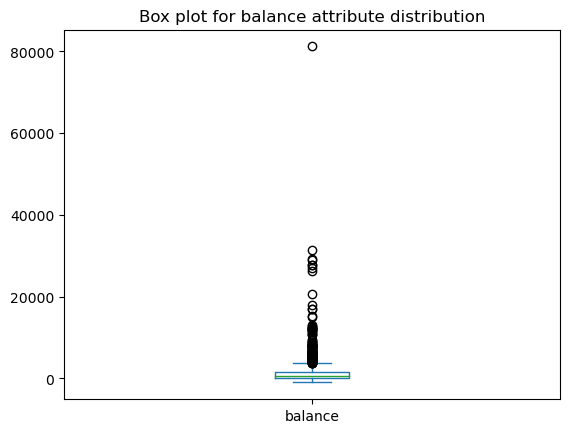

In [78]:
df['balance'].plot(kind='box')
plt.title('Box plot for balance attribute distribution');

In [79]:
balance_outlier = df.loc[df['balance'] > 40000]
balance_outlier

age  default  balance  housing  loan  duration  campaign  pdays  \
1033  84.0        0    81204        0     0       390         1     94   

      previous  subscribed  ...  marital_nan  education_secondary  \
1033         3           1  ...            0                    1   

      education_tertiary  education_nan  contact_telephone  contact_nan  \
1033                   0              0                  1            0   

      poutcome_no_previous_contact  poutcome_other  poutcome_success  \
1033                             0               0                 1   

      poutcome_nan  
1033             0  

[1 rows x 40 columns]

Looking at the box plot, there is only one value above 80,000 for `balance` which is more than twice as high as the next highest value. Though this is a legitimate value (it's conceivable that a retiree at 84 could accumulate that high of a balance), it is an obvious outlier that skews the distribution for `balance` in shifts the median and mean. As such, it will be dropped before rescaling of numerical features. 

In [80]:
df.drop(balance_outlier.index, axis=0, inplace=True)

### E.2 Rescaling Appropriate Attributes

In [81]:
# Get a new description of the "balance" numerical attribute
df['balance'].describe()

count     1925.000000
mean      1371.909610
std       2591.258438
min       -980.000000
25%        199.000000
50%        549.000000
75%       1640.000000
max      31472.000000
Name: balance, dtype: float64

In [82]:
df['balance'].plot(kind='box')
plt.title('Box plot for balance attribute distribution following outlier removal');

In [83]:
# Isolate and display numerical features for potential rescaling
features_for_rescaling = df[['age', 'balance', 'duration']]

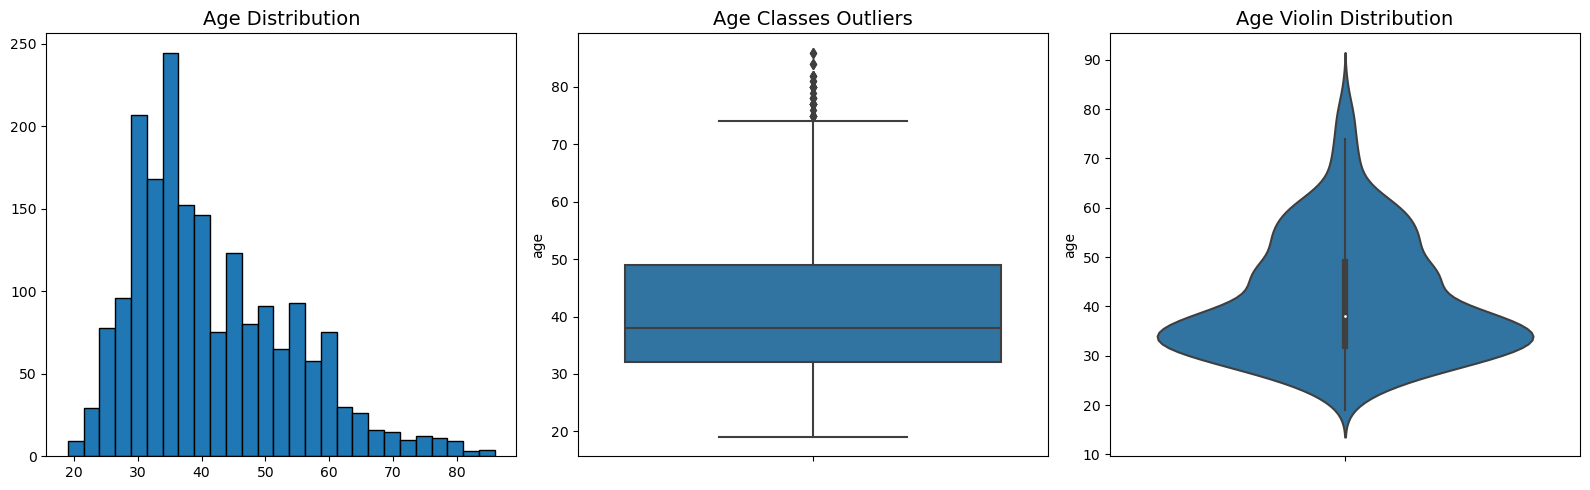

count    1925.000000
mean       41.609870
std        12.432312
min        19.000000
25%        32.000000
50%        38.000000
75%        49.000000
max        86.000000
Name: age, dtype: float64


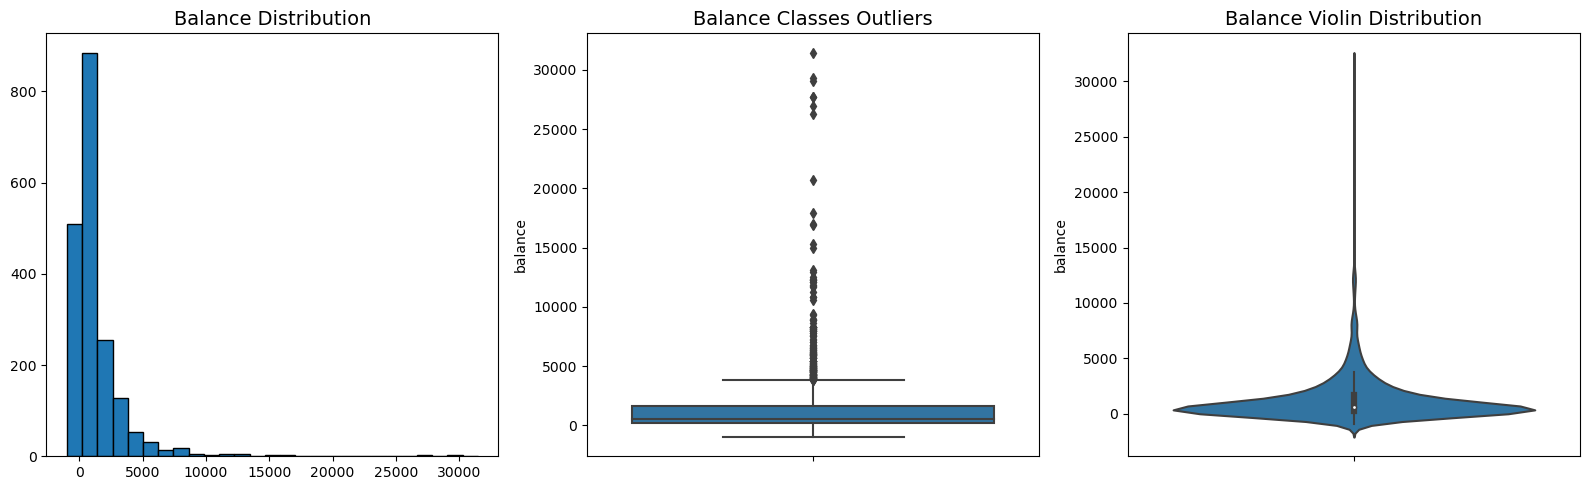

count     1925.000000
mean      1371.909610
std       2591.258438
min       -980.000000
25%        199.000000
50%        549.000000
75%       1640.000000
max      31472.000000
Name: balance, dtype: float64


count    1925.000000
mean      291.141299
std       221.772670
min         7.000000
25%       146.000000
50%       236.000000
75%       374.000000
max      1823.000000
Name: duration, dtype: float64


In [84]:
for feature in features_for_rescaling.columns:
    # Create subplots to plot two plots per row
    fig, axs =  plt.subplots(nrows=1, ncols=3, figsize = (16,5))
    
    # histogram
    axs[0].hist(df[feature], bins=27, edgecolor='black')#color = '#292929')
    axs[0].set_title(feature.title() + ' Distribution', fontsize=14)
    
    # boxplot
    sns.boxplot(data=df, y=feature, ax=axs[1])
    axs[1].set_title(feature.title() + ' Classes Outliers', fontsize=14)
    
    # violinplot
    sns.violinplot(data=df, y=feature, split=True, ax=axs[2])
    axs[2].set_title(feature.title() + ' Violin Distribution', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    print(df[feature].describe())

In [85]:
# Convert "numerical" attribute from numpy list to 
# standard Python list
numerical = list(numerical)
print(numerical)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [86]:
# As "day" has been sin and cos encoded, remove from
# numerical column list
numerical.remove('day')
print(numerical)

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [87]:
# Add new feature "total_calls" to numerical list
numerical.append('total_calls')

In [88]:
# Use RobustScaler to scale numerical attributes
robust_scaler = RobustScaler()
df[numerical] = robust_scaler.fit_transform(df[numerical])

Let's inspect the numerical attributes' distribution before and after scaling.

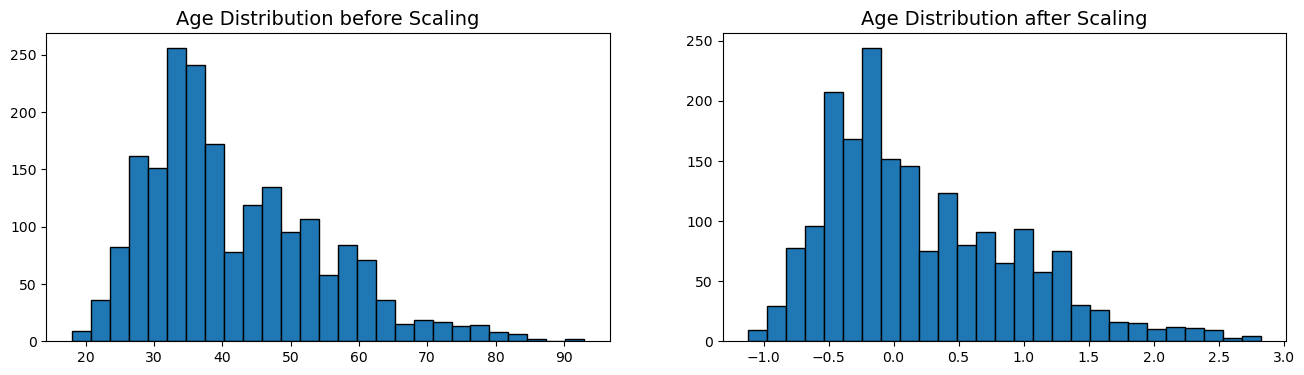

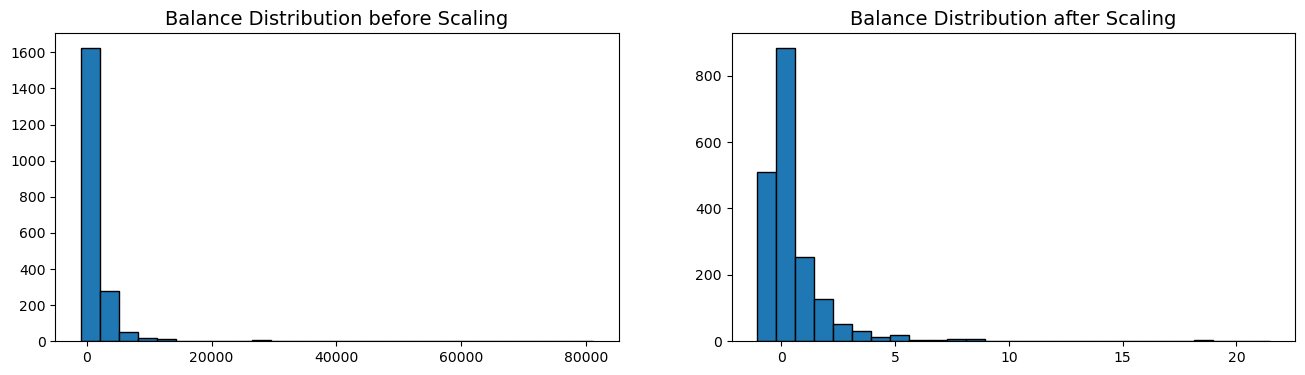

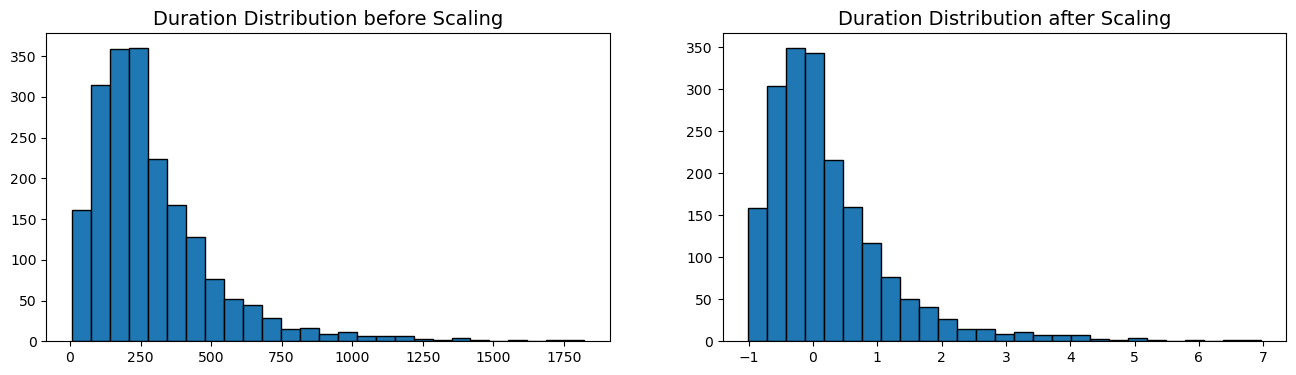

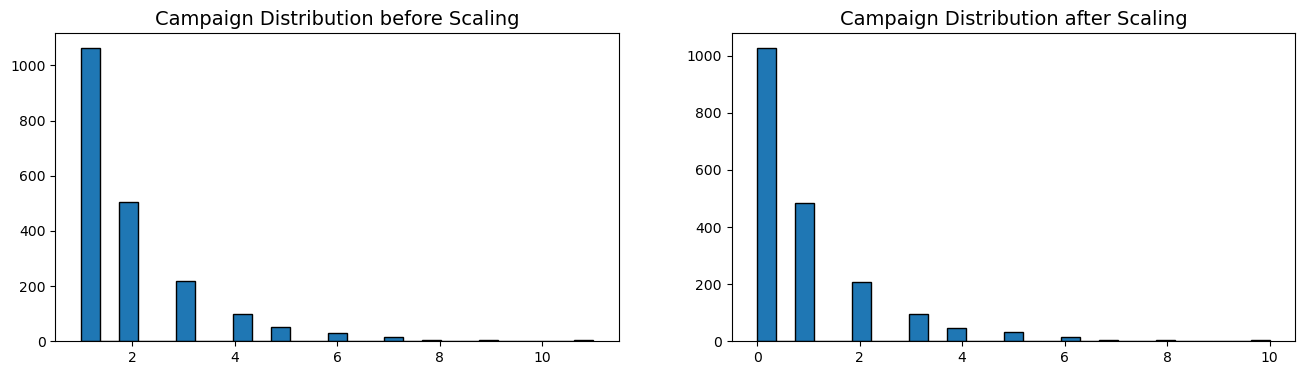

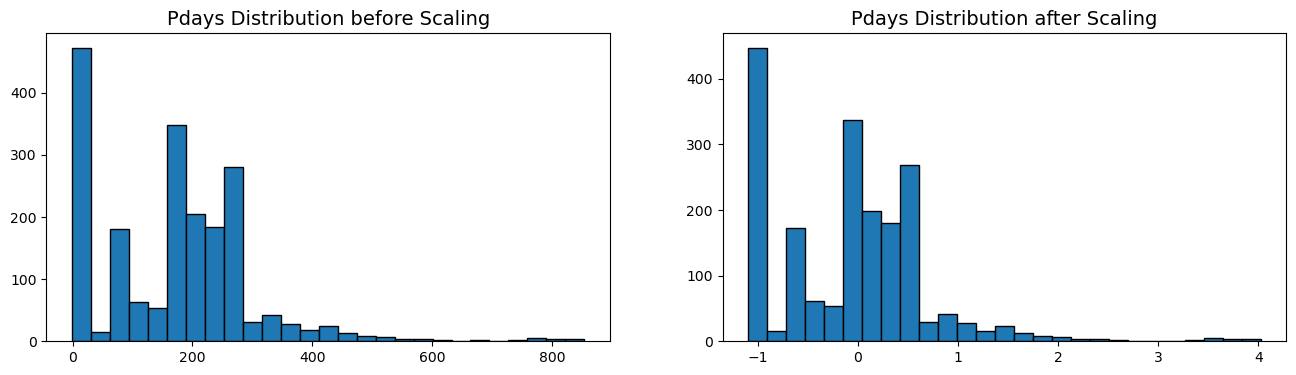

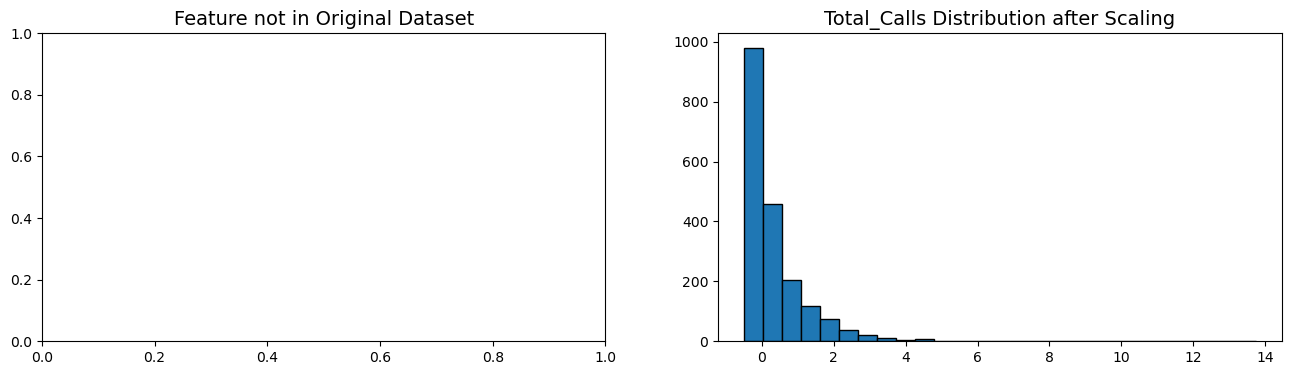

In [89]:
for feature in numerical:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    if feature in list(df_original.columns):
        axs[0].hist(df_original[feature], bins=27, edgecolor='black')
        axs[0].set_title(feature.title() + ' Distribution before Scaling', fontsize=14)
    else:
        axs[0].set_title('Feature not in Original Dataset', fontsize=14)
    axs[1].hist(df[feature], bins=27, edgecolor='black')
    axs[1].set_title(feature.title() + ' Distribution after Scaling', fontsize=14)

In [90]:
# Print the minimum values for numerical columns
# after scaling
df[numerical].min()

age           -1.117647
balance       -1.061069
duration      -1.004386
campaign       0.000000
pdays         -1.095808
previous      -1.000000
total_calls   -0.500000
dtype: float64

Looking at the distribution plots above, it appears that `balance`, `duration`, `previous` and `total_calls` are skewed to the right. As such, these attributes will be log-transformed with an appropriate shift to make all the values positive.

In [91]:
# Use a log transformation to decrease the impact of outliers and
# unskew the feature distribution
df['balance'] = np.log(df['balance'] + 2)
df['duration'] = np.log(df['duration'] + 2)
df['previous'] = np.log(df['previous'] + 2)
df['total_calls'] = np.log(df['total_calls'] + 1)

After log transormation of features, let's inspect them to see how the distributions were changed.

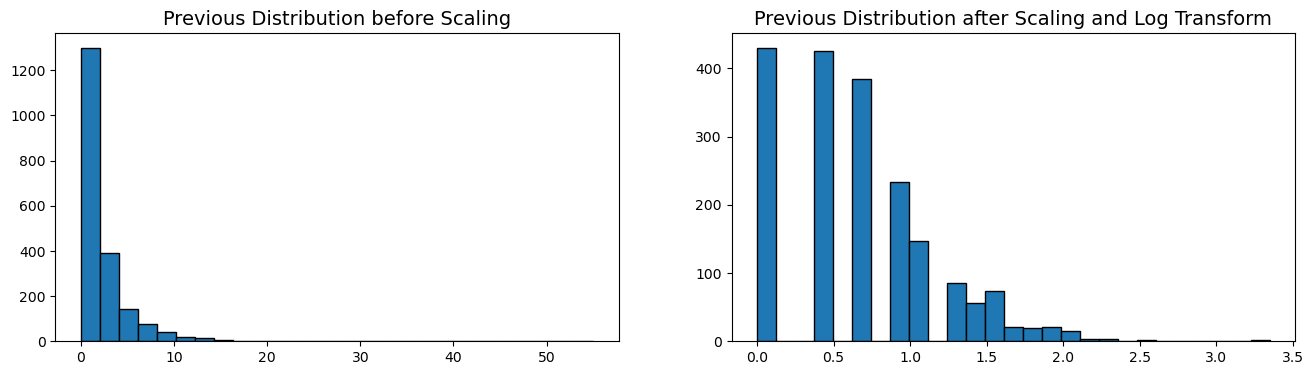

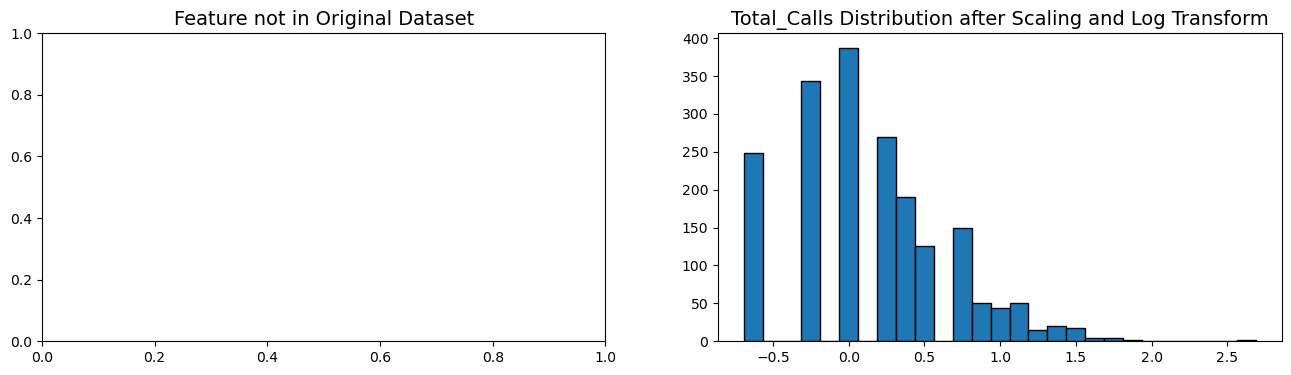

In [92]:
for feature in ['balance', 'duration', 'previous', 'total_calls']:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    if feature in list(df_original.columns):
        axs[0].hist(df_original[feature], bins=27, edgecolor='black')
        axs[0].set_title(feature.title() + ' Distribution before Scaling', fontsize=14)
    else:
        axs[0].set_title('Feature not in Original Dataset', fontsize=14)
    axs[1].hist(df[feature], bins=27, edgecolor='black')
    axs[1].set_title(feature.title() + ' Distribution after Scaling and Log Transform', fontsize=14)

A RobustScaler was used for numerical attributes to ensure the magnitude between differing values is consistent. After log-transforming `balance`, `duration`, `previous` and `total_calls`, their distributions don't appear as skewed as before.

## F. Export Prepared Dataset

### F.1 Inspection before Export

In [93]:
# Final inspection of dataset before export
df.head(3)

age  default   balance  housing  loan  duration  campaign     pdays  \
0 -0.352941        0  0.637131        1     0  1.641378       1.0 -0.305389   
1  0.058824        0  0.740251        1     1  0.686546       1.0 -0.293413   
2  1.235294        0  0.848982        1     1  0.417093       1.0  0.341317   

   previous  subscribed  ...  marital_nan  education_secondary  \
0  0.693147           0  ...            0                    0   
1  0.405465           0  ...            0                    1   
2  0.405465           0  ...            0                    1   

   education_tertiary  education_nan  contact_telephone  contact_nan  \
0                   1              0                  0            0   
1                   0              0                  0            0   
2                   0              0                  0            0   

   poutcome_no_previous_contact  poutcome_other  poutcome_success  \
0                             0               0                 0   
1                             0               0                 0   
2                             0               0                 0   

   poutcome_nan  
0             0  
1             0  
2             0  

[3 rows x 40 columns]

In [94]:
print('Original columns')
print(df_original.columns)
print(f'Number of original columns: {len(list(df_original.columns))}')

Original columns
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')
Number of original columns: 17


In [95]:
print('Prepared columns')
print(df.columns)
print(f'Number of columns following data preparation: {len(list(df.columns))}')

Prepared columns
Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'subscribed', 'total_calls', 'sin_month',
       'cos_month', 'sin_day', 'cos_day', 'sin_contact_quarter',
       'cos_contact_quarter', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_nan', 'marital_married', 'marital_single', 'marital_nan',
       'education_secondary', 'education_tertiary', 'education_nan',
       'contact_telephone', 'contact_nan', 'poutcome_no_previous_contact',
       'poutcome_other', 'poutcome_success', 'poutcome_nan'],
      dtype='object')
Number of columns following data preparation: 40


### F.2 Export to CSV

In [96]:
df.to_csv('prepared_bank.csv')

## G. Reflection

This E-tivity raised so many doubts as I was uncertain of nearly everything I did. Some of my concerns include:

- Should data be scaled and then transformed or the other way around? I went with the former option as the resulting negative value for balance was -1 whereas it was -980 before scaling. Shifting values to be positive for future data might prove tricky as the magnitude of the shift may be unknown.
- Creating new features that are actually useful and don't just increases model complexity needlessly.
- How to handle the negative `pdays` attribute. I left it as is as giving it any other value would be inaccurate.

During the Easter Break, I'll spend a lot of time reading up on this more.